In [1]:
import numpy as np
import xlrd
import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML

In [2]:
layer_sample = np.arange(0, 6, 1) # total 6
width_sample = np.arange(4, 50, 2) # total 23
layer, width = np.meshgrid(layer_sample, width_sample)

In [3]:
wb_1 = xlrd.open_workbook('./2d_offline.xls')
sheet_1 = wb_1.sheet_by_index(0)
value = np.zeros((23, 6))
for i in range(23):
    for j in range(6):
        value[i][j] = sheet_1.cell_value(layer[i][j], int((width[i][j] - 4) / 2))
value

array([[82.696, 83.574, 83.784, 84.24 , 84.752, 84.598],
       [84.842, 85.172, 85.458, 85.452, 85.754, 85.89 ],
       [85.82 , 85.896, 85.42 , 86.372, 86.56 , 86.67 ],
       [86.55 , 86.84 , 86.536, 86.874, 86.866, 87.108],
       [86.96 , 87.476, 86.75 , 86.832, 87.286, 87.6  ],
       [87.222, 87.832, 86.752, 87.33 , 87.508, 87.65 ],
       [87.352, 88.146, 87.112, 87.014, 87.522, 87.492],
       [87.876, 87.602, 87.408, 87.542, 87.926, 87.384],
       [88.066, 87.948, 87.294, 87.838, 88.164, 88.116],
       [87.808, 88.148, 87.2  , 88.012, 87.656, 88.122],
       [88.284, 88.274, 87.526, 88.17 , 87.818, 88.054],
       [87.862, 88.506, 88.032, 88.486, 87.986, 88.424],
       [88.224, 88.58 , 87.306, 88.316, 88.298, 87.306],
       [88.12 , 88.518, 87.648, 88.604, 88.232, 88.482],
       [88.13 , 88.664, 87.746, 88.332, 88.536, 88.256],
       [88.582, 88.44 , 88.022, 87.956, 88.562, 88.462],
       [88.062, 88.774, 88.142, 88.728, 88.236, 88.48 ],
       [88.364, 88.624, 88.248,

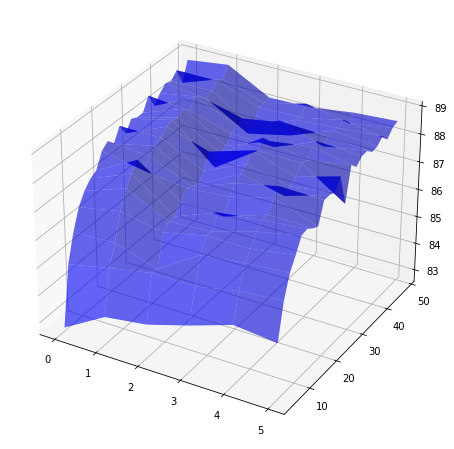

In [4]:
fig = plt.figure(figsize=(10, 8))
ax_1 = fig.add_subplot(111, projection='3d')
surf = ax_1.plot_surface(layer, width, value, color='b', alpha=0.6, label='ResNeXt')
plt.show()

In [5]:
wb_2 = xlrd.open_workbook('./trial1_pi.xls')
sheet_2 = wb_2.sheet_by_index(0)
history = np.zeros((33, 3))
for i in range(3):
    for j in range(3):
        history[i][j] = sheet_2.cell_value(i, j)
history[:3,]

array([[ 1.   , 14.   , 87.222],
       [ 3.   , 28.   , 88.316],
       [ 4.   , 32.   , 88.536]])

In [7]:
def init():
    pass

def animate(i):
    ax_1.clear()
    surf = ax_1.plot_surface(layer, width, value, color='b', alpha=0.6, label='ResNeXt')
    for j in range(3):
        history[i + 3][j] = sheet_2.cell_value(i + 3, j)
    ax_1.scatter(history[:(i + 3), 0], history[:(i + 3), 1], history[:(i + 3), 2], s=30, color='green', label='observations')
    ax_1.scatter(history[(i + 3):(i + 4), 0], history[(i + 3):(i + 4), 1], history[(i + 3):(i + 4), 2], s=30, color='red', label='new observation')
    for k in range(i + 3):
        ax_1.text(history[k][0], history[k][1], history[k][2], str(k + 1), color='black', fontsize="medium", fontweight='bold')
    ax_1.set_title('ResNeXt. Step: %s' % str(i + 3))

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=30, interval=1000, blit=False)
# anim.save('resnext_2d_cifar_pi.gif', writer='pillow', fps=1, dpi=300)
HTML(anim.to_html5_video())